## Figures for thesis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import json
import glob

In [2]:
# directory management
wdir = os.getcwd()
udir = os.path.join(os.path.split(wdir)[0], "utils")
ddir = os.path.join(os.path.split(os.path.split(wdir)[0])[0], "fair_ml_thesis_data", "rawdata")
ddir2 = os.path.join(os.path.split(os.path.split(wdir)[0])[0], "fair_ml_thesis_data", "aggregated")
fdir = os.path.join(os.path.split(os.path.split(wdir)[0])[0], "fair_ml_thesis_figures")
if not os.path.exists(fdir):
  # Create a figures directory because it does not exist
  os.makedirs(fdir)
  print("Figures directory has been created!")

json_file_path = os.path.join(udir,'tasks_metadata.json')
with open(json_file_path, 'r') as j:
    task_infos = json.loads(j.read())

### Prepare task specific aggregated files if not existent already

In [3]:
data_fn = {}

for task in task_infos["task_names"]:
    data_fn[task] = {}
    for year_path in glob.iglob(f'{ddir}\*'):
        data_fn[task][str(os.path.split(year_path)[1])] = []
        year_path_1year = year_path + r'\1-Year'
        for state_path in glob.iglob(f'{year_path_1year}\*'):
            if state_path.endswith(f"{task}.csv"):
                data_fn[task][str(os.path.split(year_path)[1])].append(state_path)


### Explore frequency of NaN values and possible ways of recoding them

In [10]:
df = pd.read_csv(data_fn['ACSHealthInsurance']['2014'][0])
df['RAC1P'] = df[['RACAIAN', 'RACASN','RACBLK', 'RACNH', 'RACPI', 'RACSOR', 'RACWHT']].idxmax(axis=1)
race_codes = {'RACAIAN':5, 'RACASN':6, 'RACBLK':2, 'RACNH':7, 'RACPI':7, 'RACSOR':8, 'RACWHT':1}
df['RAC1P'] = df['RAC1P'].map(race_codes)
df.drop(['RACAIAN', 'RACASN','RACBLK', 'RACNH', 'RACPI', 'RACSOR', 'RACWHT'], axis=1, inplace=True)
df.head(20)

,Unnamed: 0,AGEP,SCHL,MAR,SEX,DIS,ESP,CIT,MIG,MIL,...,NATIVITY,DEAR,DEYE,DREM,PINCP,ESR,ST,FER,HINS2,RAC1P
0,0,30.0,19.0,1.0,2.0,2.0,0.0,4.0,1.0,4.0,...,2.0,2.0,2.0,2.0,900.0,6.0,2.0,2.0,0.0,1
1,1,34.0,20.0,1.0,1.0,2.0,0.0,1.0,1.0,4.0,...,1.0,2.0,2.0,2.0,49760.0,1.0,2.0,0.0,0.0,1
2,2,7.0,3.0,5.0,2.0,2.0,2.0,1.0,1.0,0.0,...,1.0,2.0,2.0,2.0,0.0,0.0,2.0,0.0,0.0,1
3,3,5.0,2.0,5.0,1.0,2.0,2.0,1.0,1.0,0.0,...,1.0,2.0,2.0,2.0,0.0,0.0,2.0,0.0,0.0,1
4,4,4.0,1.0,5.0,2.0,2.0,2.0,1.0,1.0,0.0,...,1.0,2.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,1
5,5,52.0,19.0,1.0,2.0,2.0,0.0,1.0,1.0,4.0,...,1.0,2.0,2.0,2.0,900.0,6.0,2.0,0.0,0.0,1
6,6,52.0,19.0,1.0,1.0,2.0,0.0,1.0,1.0,2.0,...,1.0,2.0,2.0,2.0,60900.0,1.0,2.0,0.0,0.0,1
7,7,28.0,18.0,5.0,1.0,2.0,0.0,1.0,1.0,4.0,...,1.0,2.0,2.0,2.0,1900.0,1.0,2.0,0.0,0.0,1
8,8,38.0,21.0,1.0,2.0,2.0,0.0,1.0,1.0,4.0,...,1.0,2.0,2.0,2.0,105000.0,1.0,2.0,2.0,0.0,1
9,9,38.0,18.0,1.0,1.0,2.0,0.0,1.0,1.0,4.0,...,1.0,2.0,2.0,2.0,140000.0,1.0,2.0,0.0,0.0,1


### Create files for the three tasks concatenating all states and years

In [10]:
for task in task_infos["task_names"]:

    if not os.path.exists(os.path.join(ddir2, task)):
        print(f"Preparing task {task}")
        os.makedirs(os.path.join(ddir2, task))
        print(f"Folder for aggregated task data {os.path.join(ddir2, task)} created!")
        dfs = []
        for year_to_plot in task_infos["years"]:
            all_dfs = []
            for data_path in data_fn[task][str(year_to_plot)]:
                state_df = pd.read_csv(data_path,sep=',',header=0)
                state_df['STATE'] = os.path.split(data_path)[1][5:7]
                all_dfs.append(state_df)
            year_df = pd.concat(all_dfs, ignore_index=True)
            year_df['YEAR']=int(year_to_plot)
            dfs.append(year_df)

    final_df = pd.concat(dfs, ignore_index=True)
    final_df.to_csv(os.path.join(ddir2, task,f'{task}.csv'),sep='\t')

Preparing task ACSEmployment
Folder for aggregated task data C:\Users\sarab\Desktop\Data_Science_MSc\master_thesis\fair_ml_thesis_data\aggregated\ACSEmployment created!
Preparing task ACSHealthInsurance
Folder for aggregated task data C:\Users\sarab\Desktop\Data_Science_MSc\master_thesis\fair_ml_thesis_data\aggregated\ACSHealthInsurance created!
Preparing task ACSIncome
Folder for aggregated task data C:\Users\sarab\Desktop\Data_Science_MSc\master_thesis\fair_ml_thesis_data\aggregated\ACSIncome created!


ValueError: No objects to concatenate

## Plots

### Distribution of age across states for each year

In [22]:
task='ACSEmployment'
df1 = pd.read_csv(os.path.join(ddir2,task,f'{task}.csv'),sep='\t',index_col=0)

#y=2014
#df1=df1[df1['YEAR']==y]
df1.loc[df1['RAC1P'] > 2, 'RAC1P'] = 3

# now recode just for plots
df1.loc[df1['RAC1P'] == 1, 'RAC1P'] = 'White'
df1.loc[df1['RAC1P'] == 2, 'RAC1P'] = 'Black'
df1.loc[df1['RAC1P'] == 3, 'RAC1P'] = 'Other'
df1.loc[df1['SEX'] == 1, 'SEX'] = 'Male'
df1.loc[df1['SEX'] == 2, 'SEX'] = 'Female'

# now exclude puerto rico and keep only advised age range
df1 = df1[(df1['AGEP'].between(16,90)) & (df1['STATE']!='PR')]

#g = sns.displot(data=df1[df1['AGEP']>=16], x="AGEP", hue="RAC1P", col="STATE",col_wrap=5,
#    kind="hist",element="step",discrete=True,stat='density',common_norm=False,
#                legend=True, height=4, aspect=.7,palette= ['#476C9B','#984447','#469978'])

In [5]:
df1['SEX'].unique()

array(['Female', 'Male'], dtype=object)

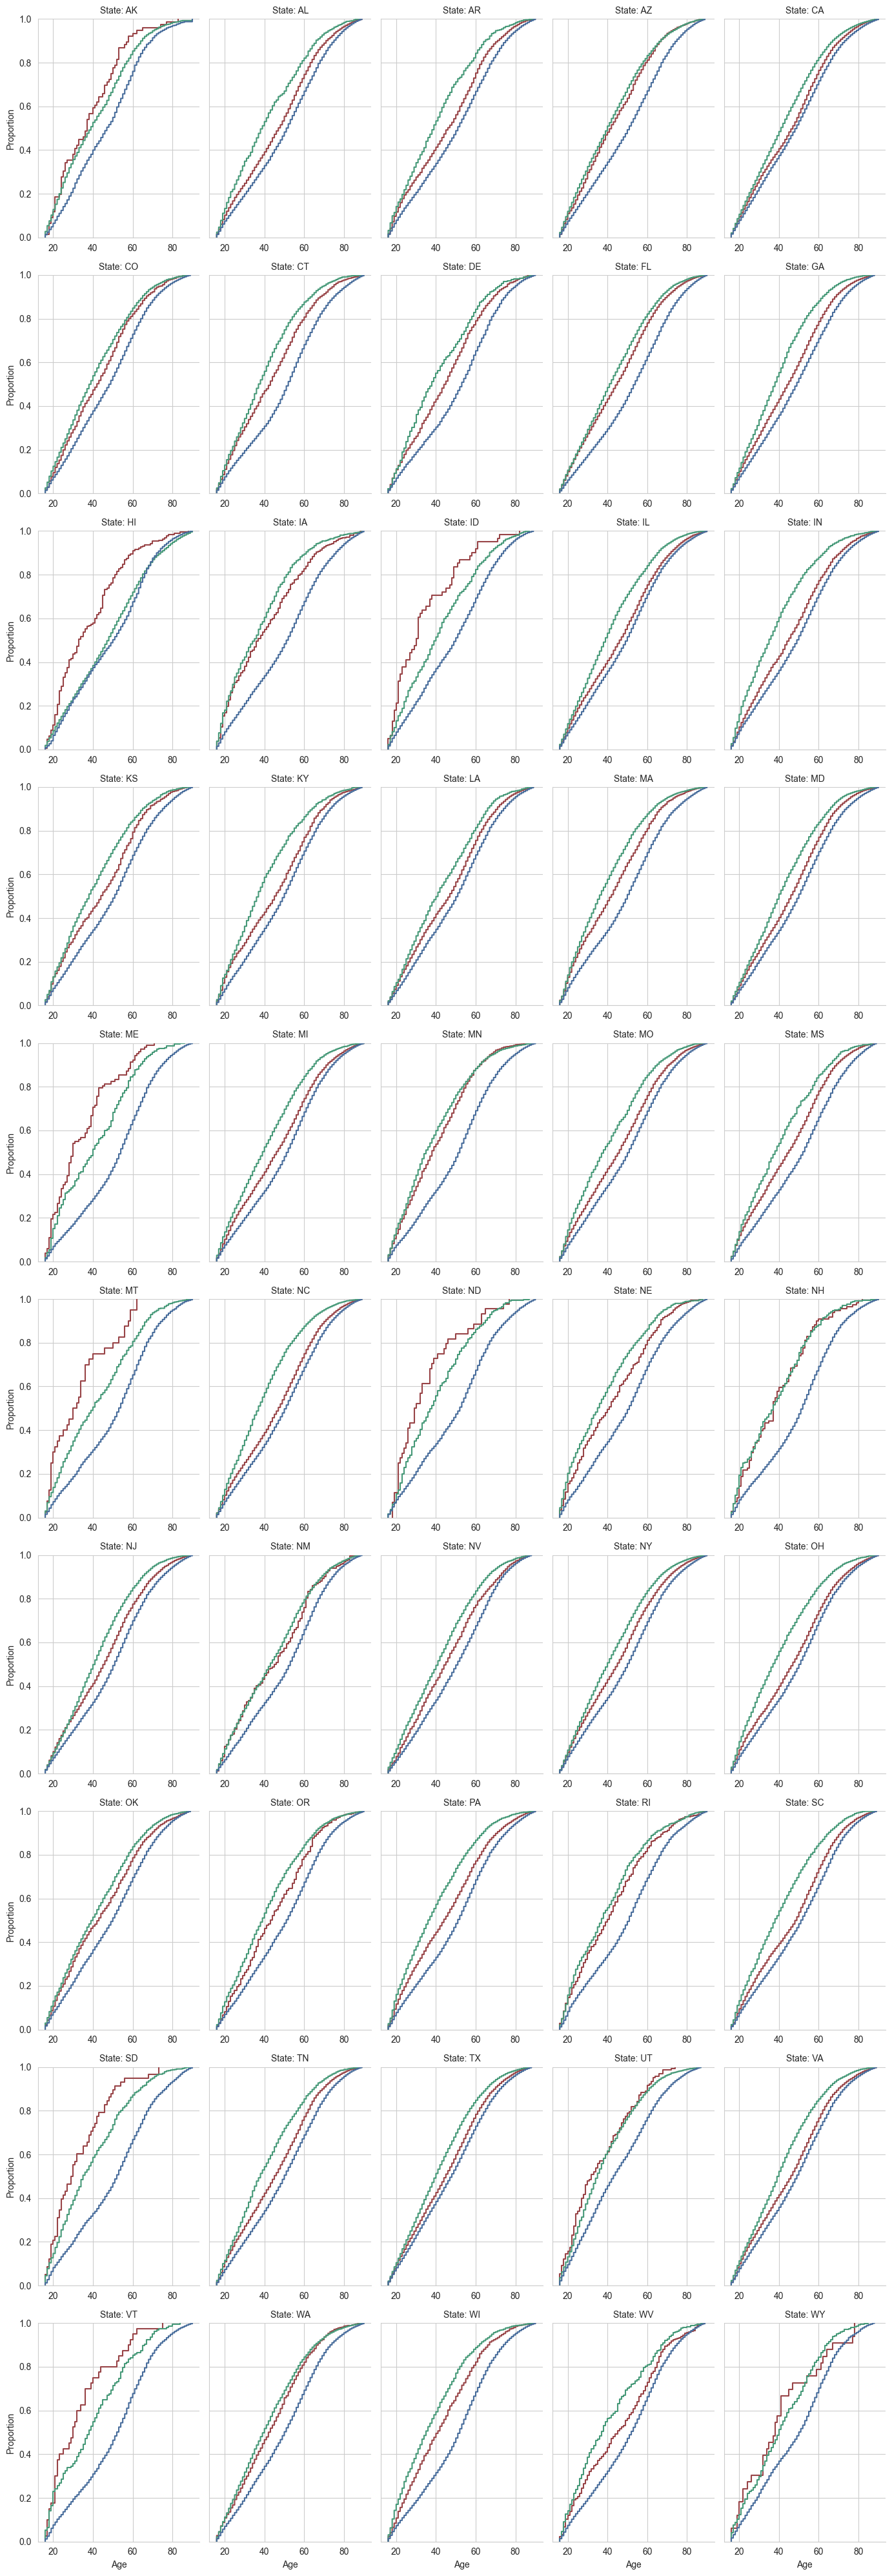

In [41]:
y = 2014

g = sns.displot(data=df1[df1['YEAR']==y], x="AGEP", hue="RAC1P", col="STATE",
                col_wrap=5,kind="ecdf",stat='proportion',legend=False, height=4, aspect=.7,
               palette= {'White':'#476C9B','Black':'#984447','Other':'#469978'})
#g.set_axis_labels("Age","Proportion")
g.set_titles("State: {col_name}")
for ax in g.axes:
    ax.tick_params(labelbottom=True)
    ax.set_xlabel("Age")
    ax.set_ylabel("Proportion")
    plt.subplots_adjust(bottom=0.5,hspace=0.5)
plt.tight_layout()
plt.savefig(os.path.join(fdir,task,f'AGEP_distribution_dependent_on_RAC1P_{task}_{y}.pdf'),format='pdf',dpi=300)

### Class counts as a function of sex and race over the years - ACSEmployment

In [23]:
df1.loc[df1['ESR'] == 1, 'ESR'] = 'Employed'
df1.loc[df1['ESR'] == 0, 'ESR'] = 'Not Employed'
df1.groupby(by=['YEAR','STATE','SEX','RAC1P'])['ESR'].value_counts(normalize=True).to_frame('Proportion (%)')\
    .reset_index()

,YEAR,STATE,SEX,RAC1P,ESR,Proportion (%)
0,2014,AK,Female,Black,Not Employed,0.600000
1,2014,AK,Female,Black,Employed,0.400000
2,2014,AK,Female,Other,Employed,0.503421
3,2014,AK,Female,Other,Not Employed,0.496579
4,2014,AK,Female,White,Employed,0.579300
...,...,...,...,...,...,...
2995,2018,WY,Male,Black,Not Employed,0.153846
2996,2018,WY,Male,Other,Employed,0.515625
2997,2018,WY,Male,Other,Not Employed,0.484375
2998,2018,WY,Male,White,Employed,0.617801


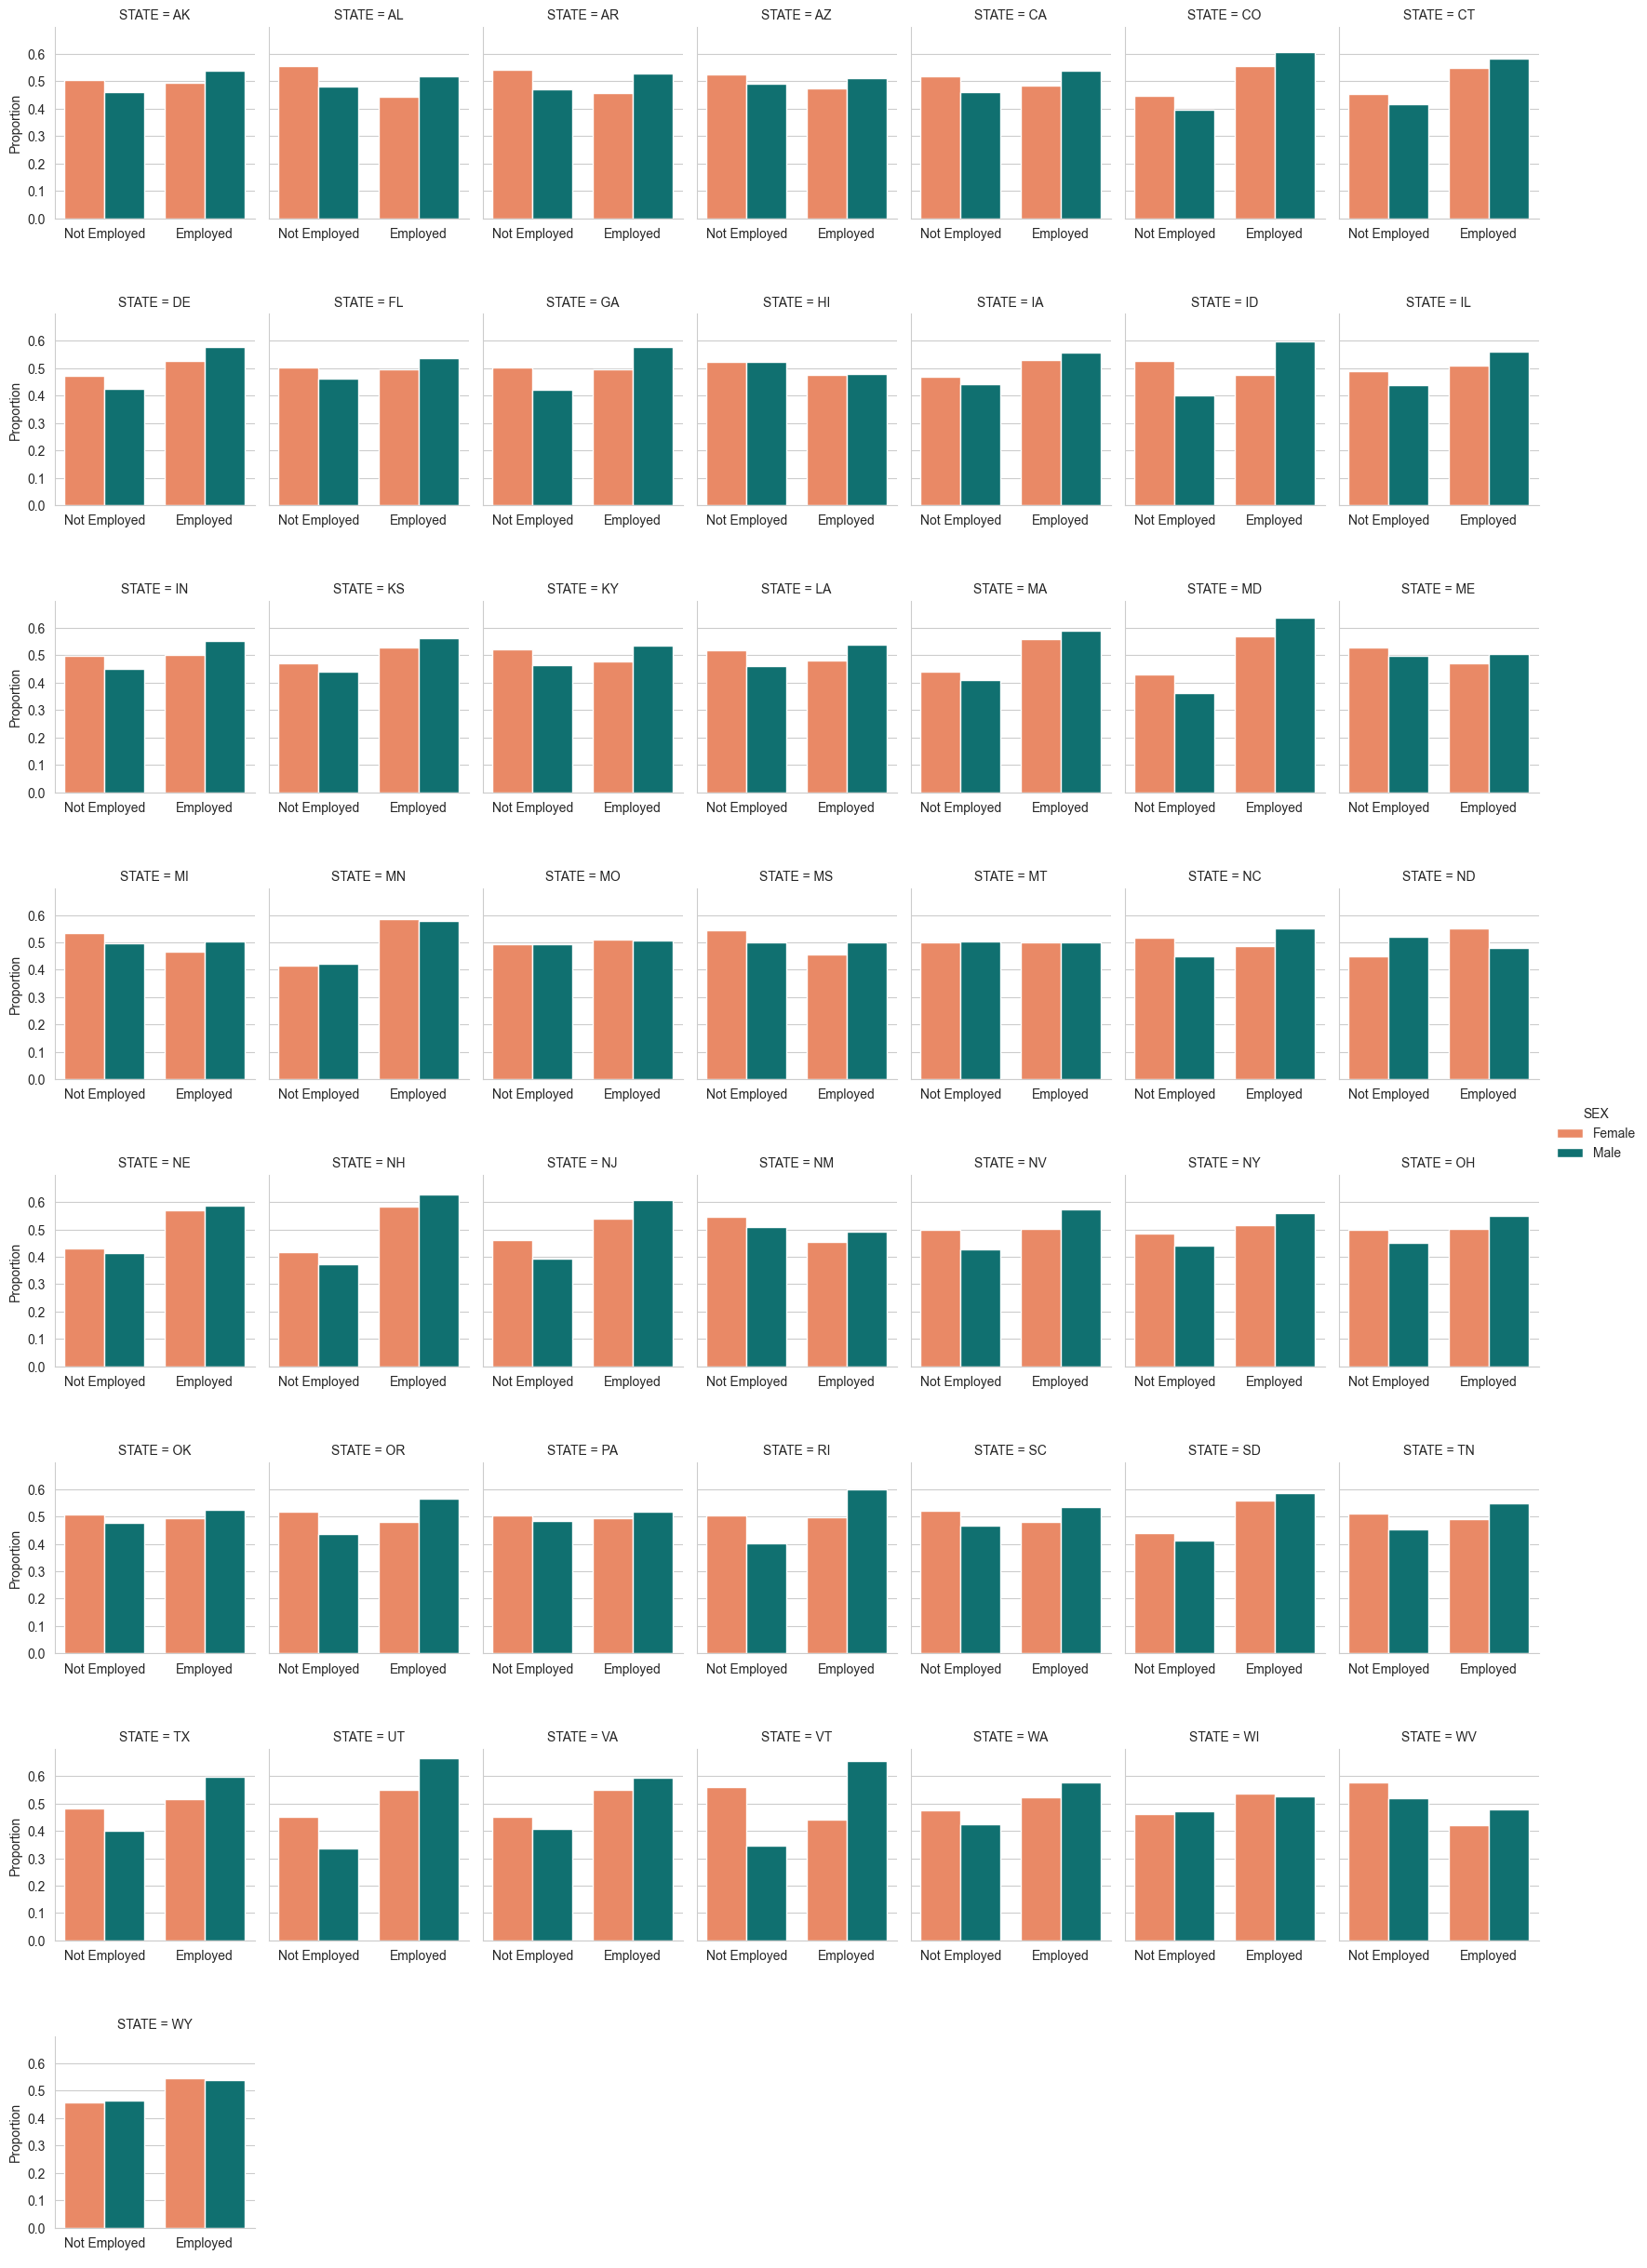

In [17]:
# create a plot for all states
#for task in task_infos["task_names"]:
#    task_data = pd.read_csv(os.path.join(ddir2, task, f"{task}.csv"),sep="\t")
#    task_data.loc[task_data['RAC1P']>2,'RAC1P']=3
#    sns.catplot(data=task_data, x="ESR", hue="SEX",row="RAC1P", col="YEAR",kind="count", height=4, aspect=.6)
y=2014
esr_df = df1.groupby(by=['YEAR','STATE','SEX','RAC1P'])['ESR'].value_counts(normalize=True).to_frame('Proportion').reset_index()
g = sns.catplot(data=esr_df[esr_df['YEAR']==2014], x="ESR",y='Proportion', hue="SEX", col="STATE",col_wrap=7,kind="bar",
            errorbar=None,
            height=6,palette={'Female': 'coral', 'Male': 'teal'}, aspect=.4) #4,0.6
for ax in g.axes:
    ax.tick_params(labelbottom=True)
    ax.set_xlabel("")
    ax.set_ylabel("Proportion")
    plt.subplots_adjust(bottom=0.5,hspace=0.5)
plt.savefig(os.path.join(fdir,task,f'ESR_distribution_dependent_on_SEX_{task}_{y}.pdf'),format='pdf',dpi=300)

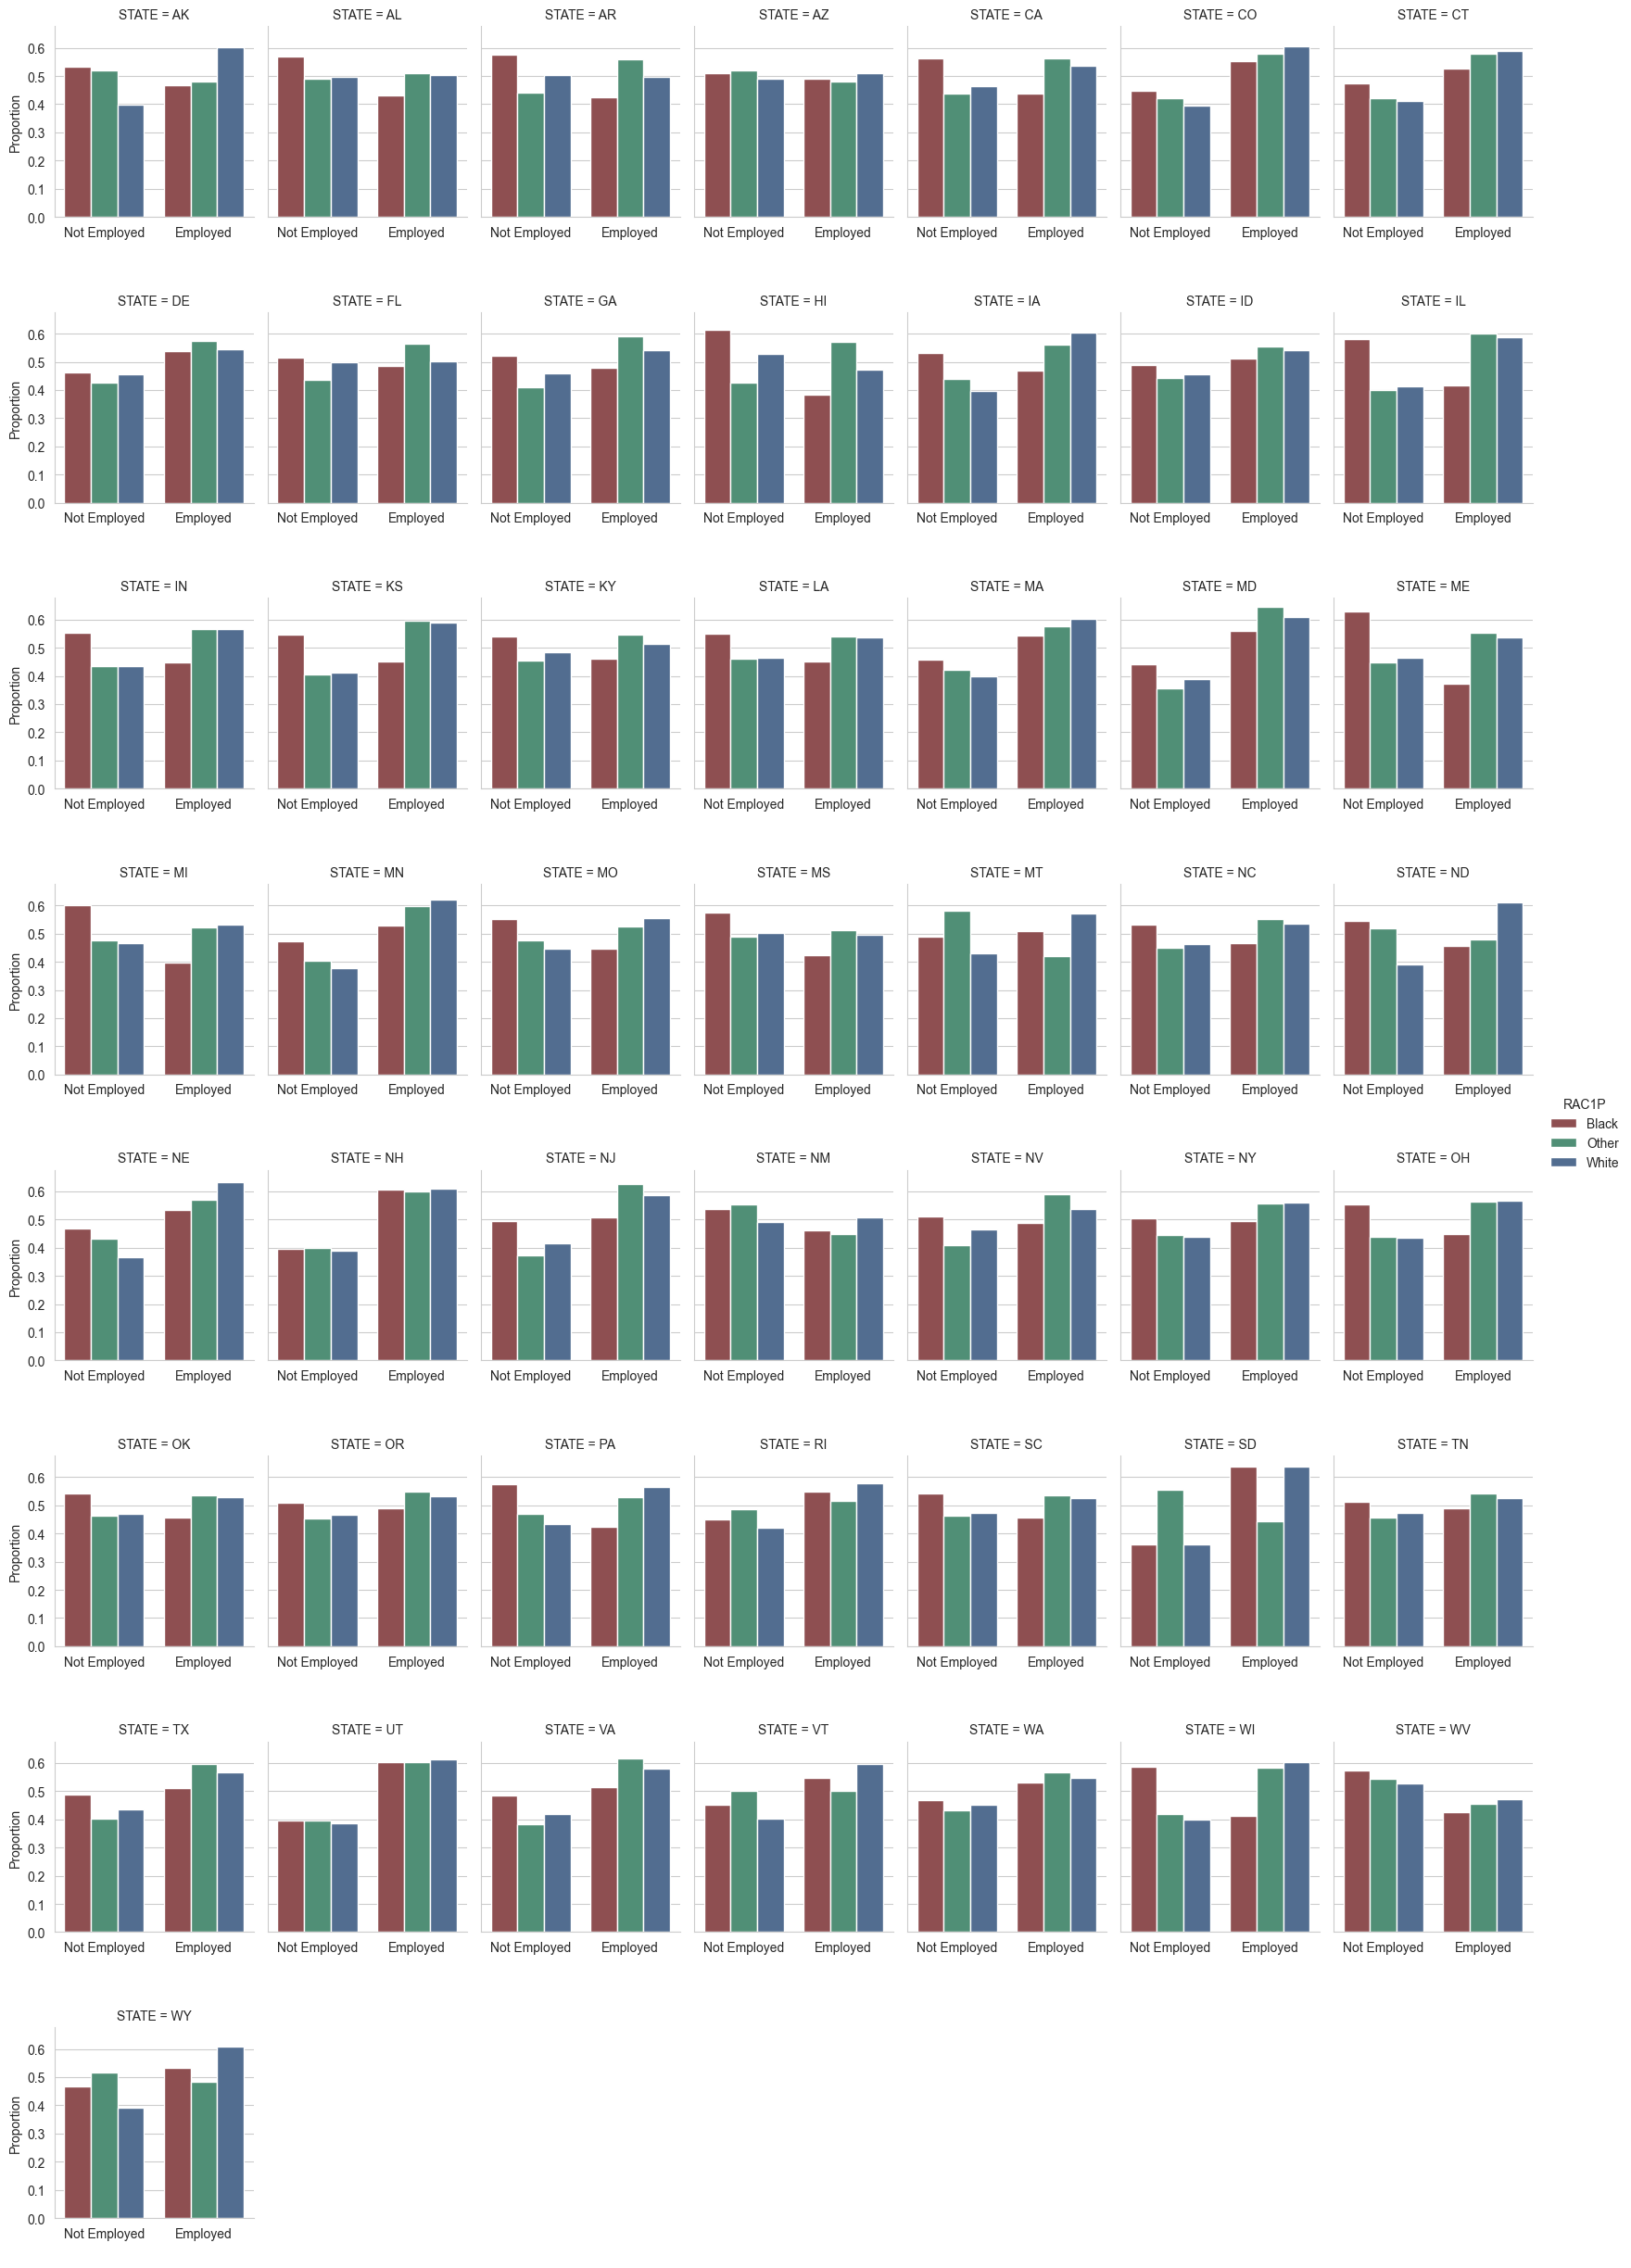

In [18]:
g = sns.catplot(data=esr_df[esr_df['YEAR']==2014], x="ESR",y='Proportion', hue="RAC1P", col="STATE",col_wrap=7,
            kind="bar",
            errorbar=None,
            height=6,palette={'White':'#476C9B','Black':'#984447','Other':'#469978'}, aspect=.4)
for ax in g.axes:
    ax.tick_params(labelbottom=True)
    ax.set_xlabel("")
    ax.set_ylabel("Proportion")
    plt.subplots_adjust(bottom=0.5,hspace=0.5)

plt.savefig(os.path.join(fdir,task,f'ESR_distribution_dependent_on_RAC1P_{task}_{y}.pdf'),format='pdf',dpi=300)

In [32]:
# employment status
SCHL= {
    1: "No schooling completed",
    2: "Nursery school, preschool",
    3:"Kindergarten",
    4:"Grade 1",
    5:"Grade 2",
    6:"Grade 3",
    7:"Grade 4",
    8:"Grade 5",
    9:"Grade 6",
    10:"Grade 7",
    11:"Grade 8",
    12:"Grade 9",
    13:"Grade 10",
    14:"Grade 11",
    15:"Grade 12 - no diploma",
    16:"Regular high school diploma",
    17:"GED or alternative credential",
    18:"Some college, but less than 1 year",
    19:"1 or more years of college credit, no degree",
    20:"Associate degree",
    21:"Bachelor degree",
    22:"Master degree",
    23:"Professional degree beyond a bachelor degree",
    24:"Doctorate degree"}
df1.loc[:, 'SCHL'] = df1['SCHL'].astype(np.int64)
df1['SCHL'] = df1['SCHL'].map(SCHL)
edu_df = df1.groupby(by=['YEAR','STATE','SEX','RAC1P'])['SCHL'].value_counts(normalize=True).to_frame('Proportion')\
    .reset_index()
edu_df

C:\Users\sarab\AppData\Local\Temp\ipykernel_7736\2672773721.py:27: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df1.loc[:, 'SCHL'] = df1['SCHL'].astype(np.int64)


,YEAR,STATE,SEX,RAC1P,SCHL,Proportion
0,2014,AK,Female,Black,Regular high school diploma,0.300000
1,2014,AK,Female,Black,"1 or more years of college credit, no degree",0.200000
2,2014,AK,Female,Black,Associate degree,0.200000
3,2014,AK,Female,Black,"Some college, but less than 1 year",0.100000
4,2014,AK,Female,Black,Doctorate degree,0.050000
...,...,...,...,...,...,...
31205,2018,WY,Male,White,Grade 6,0.004284
31206,2018,WY,Male,White,No schooling completed,0.003808
31207,2018,WY,Male,White,Grade 7,0.000952
31208,2018,WY,Male,White,Grade 3,0.000476


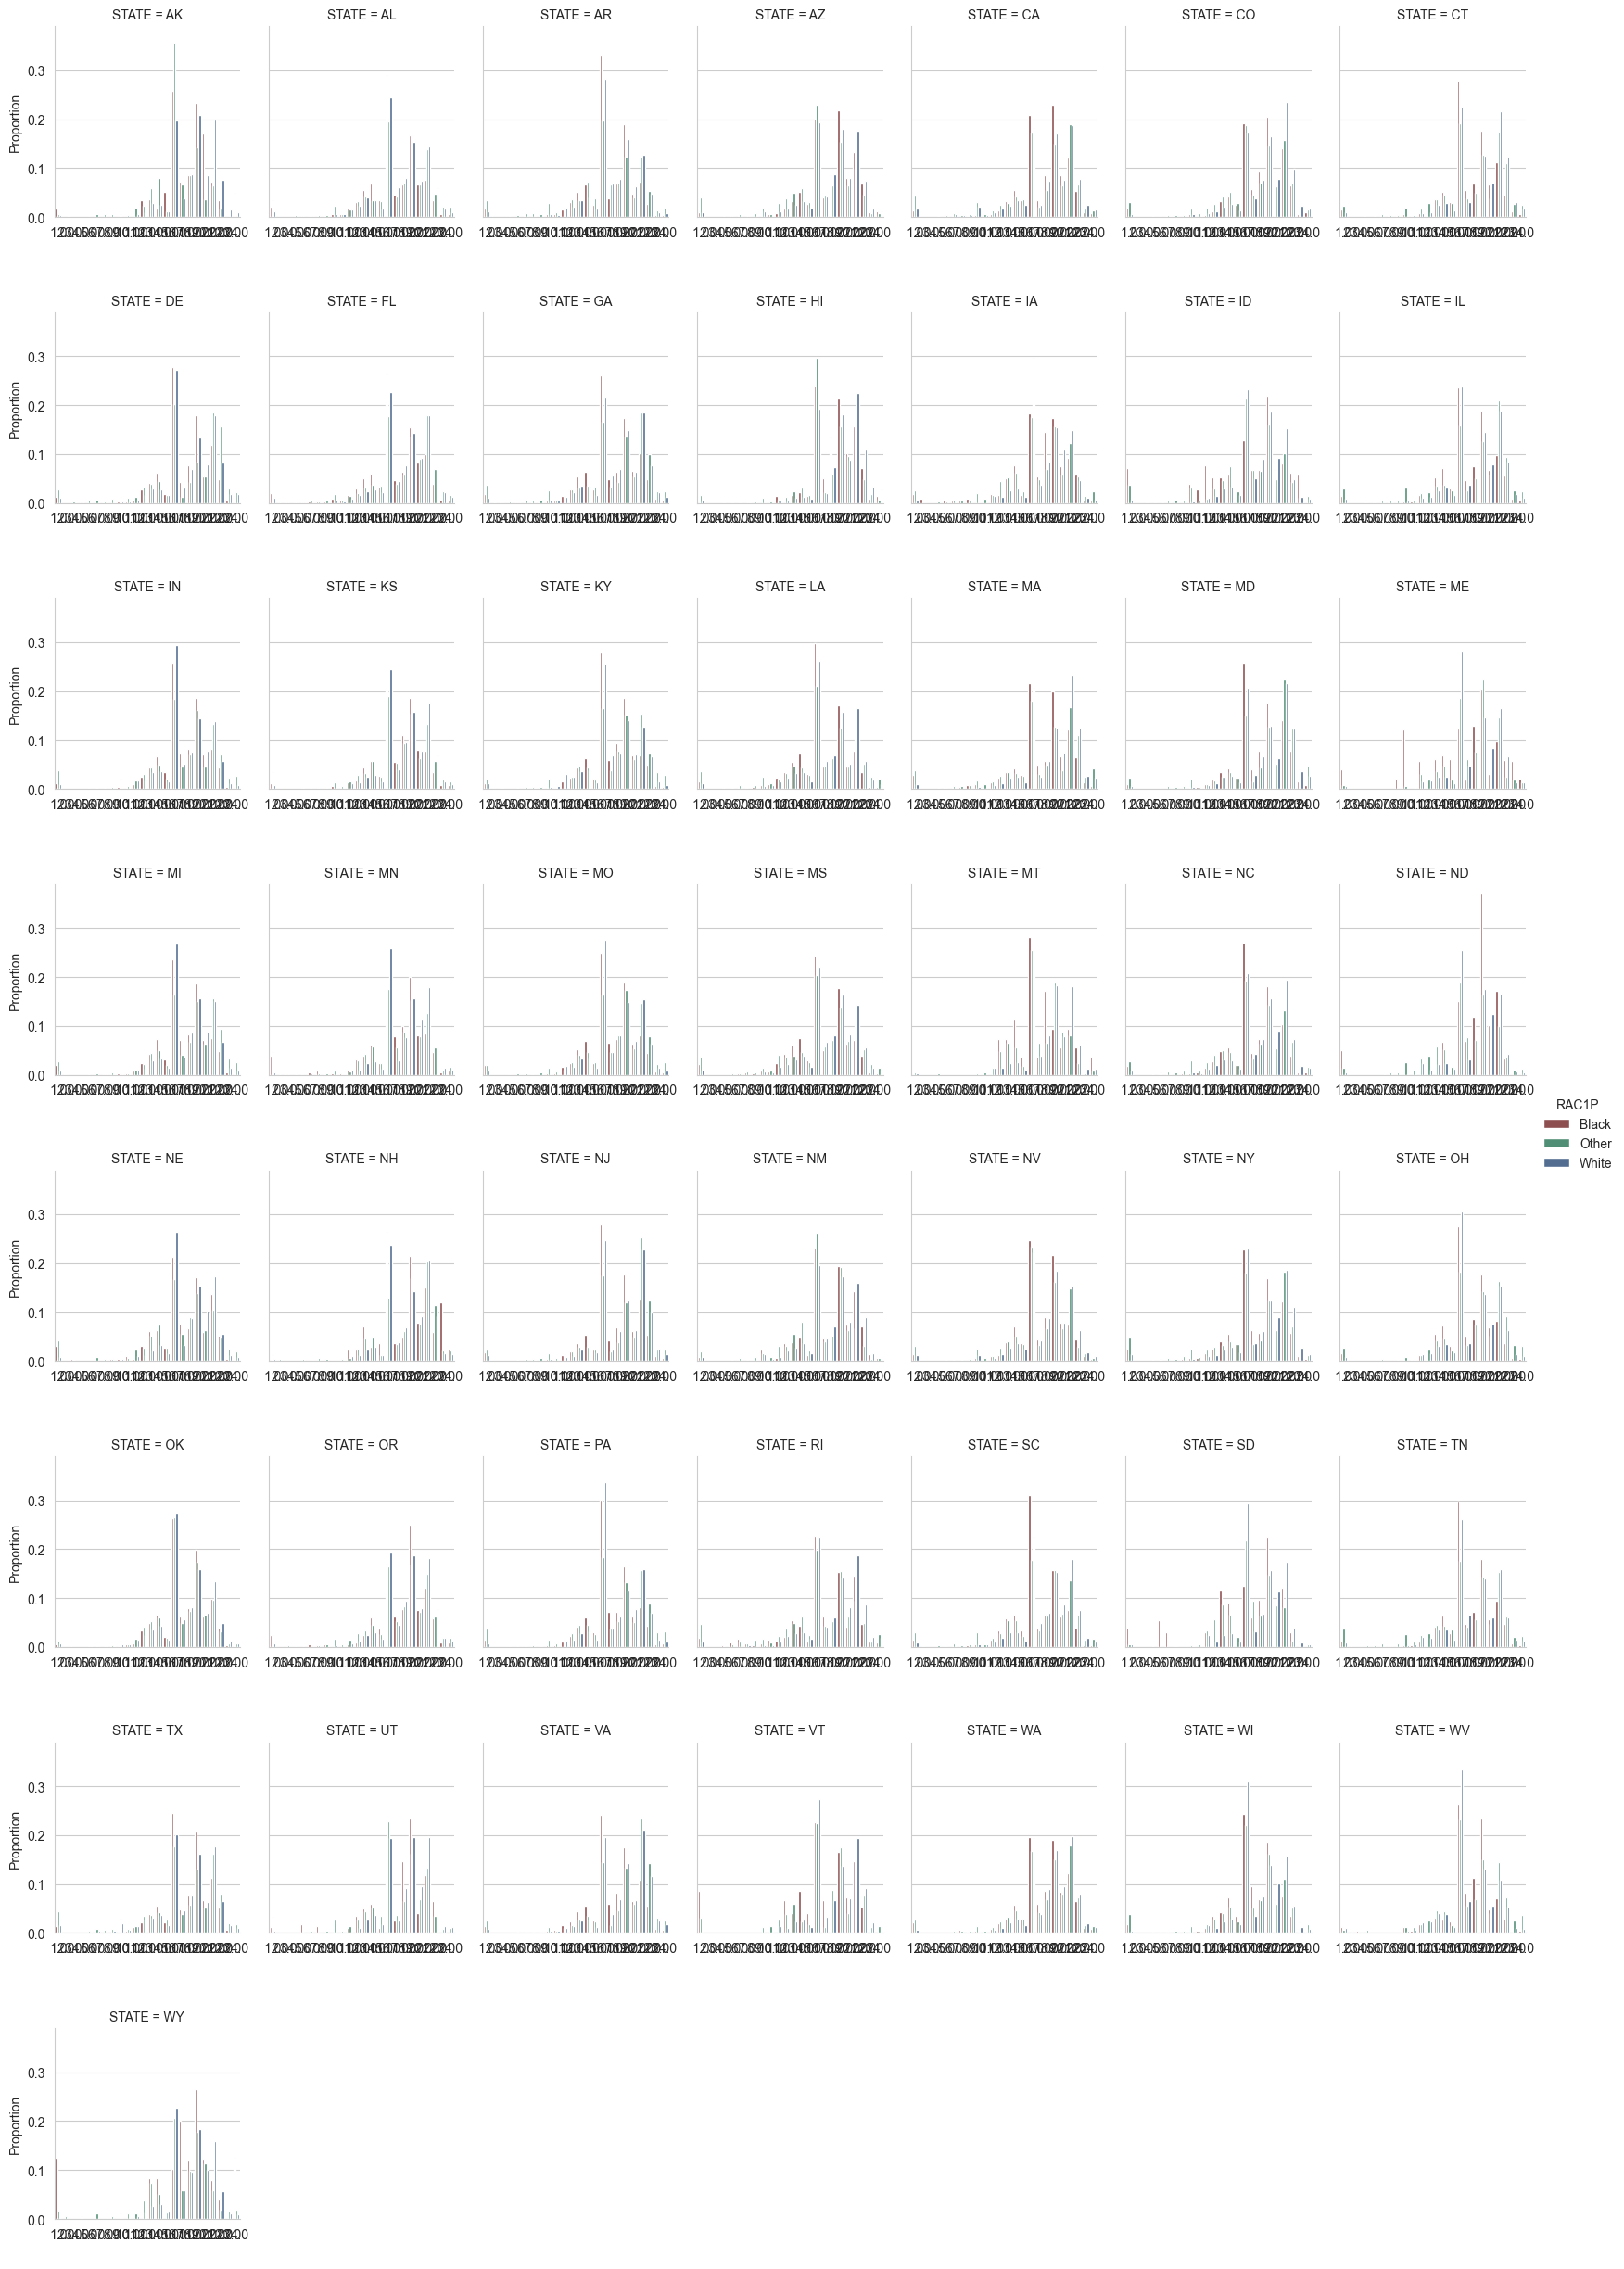

In [25]:
g = sns.catplot(data=edu_df[edu_df['YEAR']==2014], x="SCHL",y='Proportion', hue="RAC1P", col="STATE",col_wrap=7,
            kind="bar",
            errorbar=None,
            height=6,palette={'White':'#476C9B','Black':'#984447','Other':'#469978'}, aspect=.4)
for ax in g.axes:
    ax.tick_params(labelbottom=True)
    ax.set_xlabel("")
    ax.set_ylabel("Proportion")
    plt.subplots_adjust(bottom=0.5,hspace=0.5)

In [38]:
df1[df1['SCHL']=='No schooling completed']

,Unnamed: 0,AGEP,SCHL,MAR,RELP,DIS,ESP,CIT,MIG,MIL,ANC,NATIVITY,DEAR,DEYE,DREM,SEX,RAC1P,ESR,STATE,YEAR
32,32,56.0,No schooling completed,1.0,1.0,2.0,0.0,1.0,1.0,4.0,3.0,1.0,2.0,2.0,2.0,Male,White,Not Employed,AK,2014
50,50,39.0,No schooling completed,1.0,0.0,2.0,0.0,5.0,1.0,4.0,1.0,2.0,2.0,2.0,2.0,Female,White,Employed,AK,2014
51,51,49.0,No schooling completed,1.0,1.0,2.0,0.0,4.0,1.0,4.0,1.0,2.0,2.0,2.0,2.0,Male,White,Not Employed,AK,2014
851,851,63.0,No schooling completed,3.0,0.0,1.0,0.0,1.0,1.0,4.0,3.0,1.0,2.0,1.0,1.0,Female,White,Not Employed,AK,2014
1188,1188,63.0,No schooling completed,1.0,6.0,1.0,0.0,1.0,1.0,4.0,2.0,1.0,2.0,2.0,2.0,Female,White,Not Employed,AK,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15948132,4492,80.0,No schooling completed,1.0,1.0,1.0,0.0,4.0,1.0,4.0,4.0,2.0,1.0,1.0,2.0,Male,White,Not Employed,WY,2018
15948164,4524,71.0,No schooling completed,1.0,1.0,1.0,0.0,1.0,1.0,4.0,4.0,1.0,1.0,2.0,1.0,Female,White,Not Employed,WY,2018
15948522,4882,66.0,No schooling completed,4.0,0.0,2.0,0.0,1.0,3.0,2.0,4.0,1.0,2.0,2.0,2.0,Female,White,Employed,WY,2018
15948704,5064,72.0,No schooling completed,3.0,15.0,1.0,0.0,1.0,3.0,4.0,4.0,1.0,2.0,2.0,2.0,Female,White,Not Employed,WY,2018


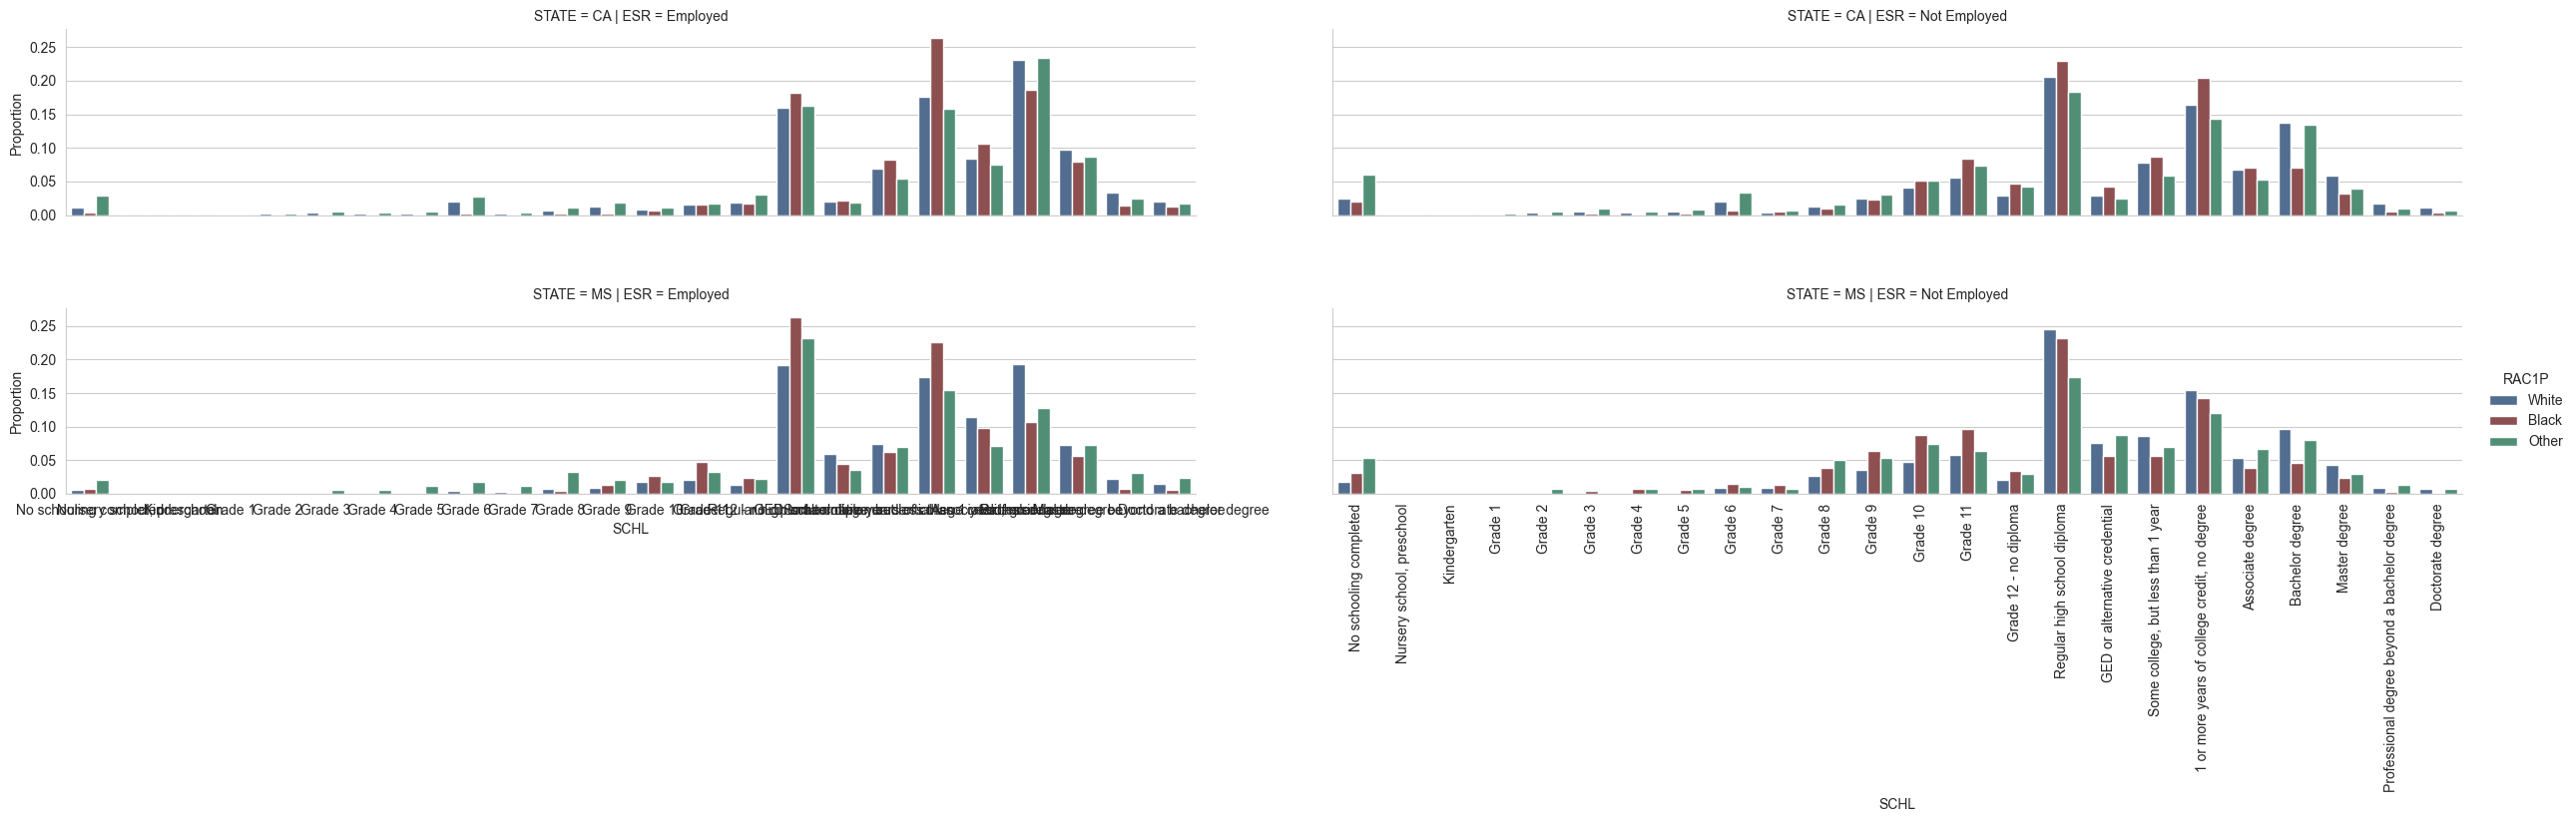

In [63]:
edu_df2 = df1.groupby(by=['YEAR','STATE','SEX','RAC1P','ESR'])['SCHL'].value_counts(normalize=True).to_frame\
    ('Proportion')\
    .reset_index()

g = sns.catplot(data=edu_df2[(edu_df2['YEAR']==2014)&(edu_df2['STATE'].isin(['MS','CA']))],
                x="SCHL",
                y='Proportion',
                hue="RAC1P",
                row='STATE',
                col='ESR',
                order=[ "No schooling completed","Nursery school, preschool","Kindergarten","Grade 1","Grade 2",
"Grade 3",
"Grade 4",
"Grade 5",
"Grade 6",
"Grade 7",
 "Grade 8",
"Grade 9",
"Grade 10",
"Grade 11",
    "Grade 12 - no diploma",
   "Regular high school diploma",
   "GED or alternative credential",
  "Some college, but less than 1 year",
    "1 or more years of college credit, no degree",
    "Associate degree",
    "Bachelor degree",
"Master degree",
"Professional degree beyond a bachelor degree",
"Doctorate degree"], hue_order=['White','Black','Other'],palette={'White':'#476C9B','Black':'#984447',
                                                                  'Other':'#469978'},
            kind='bar', errorbar=None, aspect=2.5)
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.5,hspace=0.5)

## Analysis Results

### Relationship between accuracy and fairness metrics (one plot for each state, focus on one year at a time)

### ROC curves

### General accuracy comparison